In [1]:
import tensorflow as tf
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras import backend as K
import shutil
import glob
import re

In [2]:
No_brain_tumor = r'C:\Users\GOD\Leelavathi mam intern\no'
Yes_brain_tumor = r'C:\Users\GOD\Leelavathi mam intern\yes'

In [3]:
dirlist=[No_brain_tumor, Yes_brain_tumor]
classes=['No', 'Yes']
filepaths=[]
labels=[]

In [4]:
for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    #print(filelist)
    #print('\n')
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)
    #print(filepaths)
    #print('\n')
    #print(labels)
    #print('\n')
#print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

In [1]:
print(filepath)

NameError: name 'filepath' is not defined

In [6]:
print(labels)

['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'

In [7]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)
df

,filepaths,labels
0,C:\Users\GOD\Leelavathi mam intern\no\1 no.jpeg,No
1,C:\Users\GOD\Leelavathi mam intern\no\10 no.jpg,No
2,C:\Users\GOD\Leelavathi mam intern\no\11 no.jpg,No
3,C:\Users\GOD\Leelavathi mam intern\no\12 no.jpg,No
4,C:\Users\GOD\Leelavathi mam intern\no\13 no.jpg,No
...,...,...
248,C:\Users\GOD\Leelavathi mam intern\yes\Y95.jpg,Yes
249,C:\Users\GOD\Leelavathi mam intern\yes\Y96.jpg,Yes
250,C:\Users\GOD\Leelavathi mam intern\yes\Y97.JPG,Yes
251,C:\Users\GOD\Leelavathi mam intern\yes\Y98.JPG,Yes


In [8]:
df['labels']=pd.get_dummies(df['labels'])

In [9]:
df

,filepaths,labels
0,C:\Users\GOD\Leelavathi mam intern\no\1 no.jpeg,1
1,C:\Users\GOD\Leelavathi mam intern\no\10 no.jpg,1
2,C:\Users\GOD\Leelavathi mam intern\no\11 no.jpg,1
3,C:\Users\GOD\Leelavathi mam intern\no\12 no.jpg,1
4,C:\Users\GOD\Leelavathi mam intern\no\13 no.jpg,1
...,...,...
248,C:\Users\GOD\Leelavathi mam intern\yes\Y95.jpg,0
249,C:\Users\GOD\Leelavathi mam intern\yes\Y96.jpg,0
250,C:\Users\GOD\Leelavathi mam intern\yes\Y97.JPG,0
251,C:\Users\GOD\Leelavathi mam intern\yes\Y98.JPG,0


<Figure size 288x288 with 0 Axes>

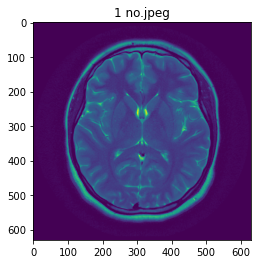

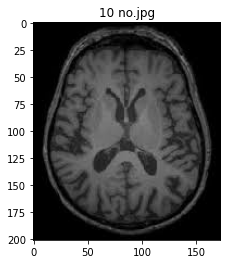

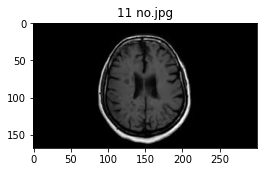

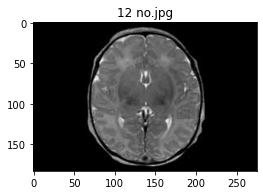

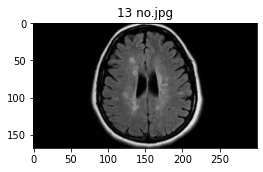

In [10]:
plt.figure(figsize=(4,4))
for i in range(0,5):
    fig, ax = plt.subplots(figsize=(4,4))
    img = mpimg.imread(df['filepaths'][i])
    img_name = re.sub(r'^\D+','',df['filepaths'][i])
    ax.imshow(img)
    ax.set_title(img_name)

In [11]:
from PIL import Image
widths = []
heights = []
for idx, row in df.iterrows():
    path = row['filepaths']
    im = Image.open(path)
    width, height = im.size
    widths.append(width)
    heights.append(height)
avg_width = int(sum(widths) / len(widths))
avg_height = int(sum(heights) / len(heights))
print(avg_width, avg_height)

354 386


In [12]:
from keras.preprocessing.image import load_img

def load_resize_color_image(path):
    # load image and resize to 300x300
    image = load_img(path,target_size=(300,300))
    return image

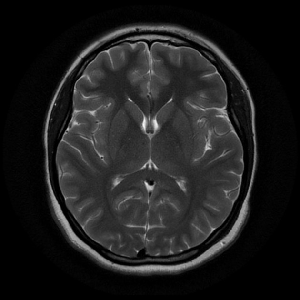

In [13]:
load_resize_color_image(r'C:\Users\GOD\Leelavathi mam intern\no\1 no.jpeg')

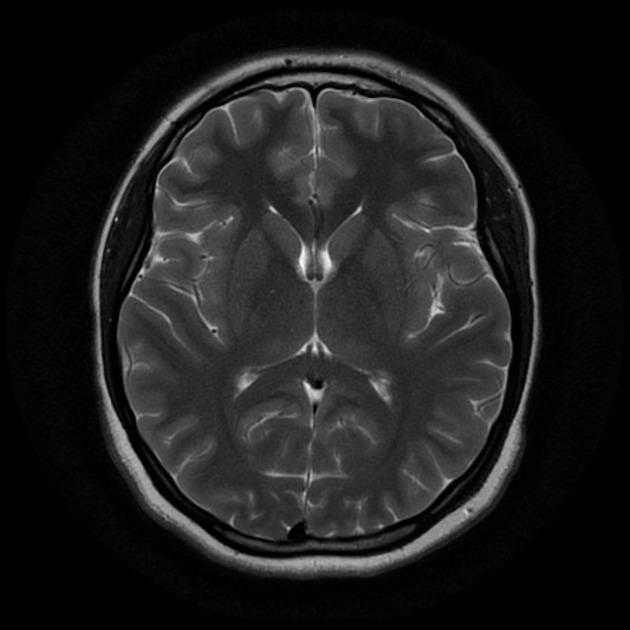

In [14]:
load_img(r'C:\Users\GOD\Leelavathi mam intern\no\1 no.jpeg')

In [15]:
image_list =[]
cancer_list =[]
from keras.preprocessing.image import img_to_array
for idx, row in df.iterrows():
    path = row['filepaths']
    cancer = row['labels']
#   print(path)
#   print(cancer)
# brain_tumor_dataset/no/1 no.jpeg
# No
# brain_tumor_dataset/no/10 no.jpg
# No
    image = load_resize_color_image(path)
    # turn image to array
    image_array = img_to_array(image)   
    image_list.append(image_array)
    cancer_list.append(cancer)

In [16]:
print(image_list[0:2])

[array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32), array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [

In [17]:
print(cancer_list[0:5])

[1, 1, 1, 1, 1]


In [18]:
from sklearn.utils import shuffle
image_list, cancer_list = shuffle(image_list, cancer_list)

In [19]:
X_data = np.array(image_list)
y_data = np.array(cancer_list)

In [20]:
print(X_data.shape)
print(y_data.shape)

(253, 300, 300, 3)
(253,)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=0)

In [22]:
print(X_train.shape)
print(y_train.shape)

(202, 300, 300, 3)
(202,)


In [23]:
print(X_test.shape)
print(y_test.shape)

(51, 300, 300, 3)
(51,)


In [24]:
X_test

array([[[[  9.,   9.,   9.],
         [  9.,   9.,   9.],
         [  9.,   9.,   9.],
         ...,
         [  8.,   8.,   8.],
         [  8.,   8.,   8.],
         [  8.,   8.,   8.]],

        [[  9.,   9.,   9.],
         [  9.,   9.,   9.],
         [  9.,   9.,   9.],
         ...,
         [  8.,   8.,   8.],
         [  8.,   8.,   8.],
         [  8.,   8.,   8.]],

        [[  9.,   9.,   9.],
         [  9.,   9.,   9.],
         [  9.,   9.,   9.],
         ...,
         [  8.,   8.,   8.],
         [  8.,   8.,   8.],
         [  8.,   8.,   8.]],

        ...,

        [[  8.,   8.,   8.],
         [  8.,   8.,   8.],
         [  8.,   8.,   8.],
         ...,
         [  9.,   9.,   9.],
         [  9.,   9.,   9.],
         [  9.,   9.,   9.]],

        [[  8.,   8.,   8.],
         [  8.,   8.,   8.],
         [  8.,   8.,   8.],
         ...,
         [  9.,   9.,   9.],
         [  9.,   9.,   9.],
         [  9.,   9.,   9.]],

        [[  8.,   8.,   8.],
       

In [25]:
X_train = X_train/255
X_test = X_test/255

In [26]:
X_test

array([[[[0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412],
         ...,
         [0.03137255, 0.03137255, 0.03137255],
         [0.03137255, 0.03137255, 0.03137255],
         [0.03137255, 0.03137255, 0.03137255]],

        [[0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412],
         ...,
         [0.03137255, 0.03137255, 0.03137255],
         [0.03137255, 0.03137255, 0.03137255],
         [0.03137255, 0.03137255, 0.03137255]],

        [[0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412],
         ...,
         [0.03137255, 0.03137255, 0.03137255],
         [0.03137255, 0.03137255, 0.03137255],
         [0.03137255, 0.03137255, 0.03137255]],

        ...,

        [[0.03137255, 0.03137255, 0.03137255],
         [0.03137255, 0.03137255, 0.03137255]

In [27]:
print(X_train.shape)
print(X_test.shape)

(202, 300, 300, 3)
(51, 300, 300, 3)


In [28]:
epochs = 10
batch_size = 10
input_shape = (300,300,3)

In [29]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# ANN structure
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [31]:
model.compile(loss="binary_crossentropy",
              optimizer='Adam',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
21/21 [==============================] - 37s 2s/step - loss: 0.6638 - accuracy: 0.6683 - val_loss: 0.5054 - val_accuracy: 0.7647
Epoch 2/10
21/21 [==============================] - 34s 2s/step - loss: 0.5533 - accuracy: 0.7475 - val_loss: 0.4760 - val_accuracy: 0.7843
Epoch 3/10
21/21 [==============================] - 34s 2s/step - loss: 0.4779 - accuracy: 0.8267 - val_loss: 0.4656 - val_accuracy: 0.8235
Epoch 4/10
21/21 [==============================] - 34s 2s/step - loss: 0.4016 - accuracy: 0.8614 - val_loss: 0.5033 - val_accuracy: 0.7647
Epoch 5/10
21/21 [==============================] - 37s 2s/step - loss: 0.3113 - accuracy: 0.8663 - val_loss: 0.4223 - val_accuracy: 0.8235
Epoch 6/10
21/21 [==============================] - 39s 2s/step - loss: 0.2536 - accuracy: 0.9059 - val_loss: 0.5309 - val_accuracy: 0.8039
Epoch 7/10
21/21 [==============================] - 36s 2s/step - loss: 0.1517 - accuracy: 0.9604 - val_loss: 0.5515 - val_accuracy: 0.8431
Epoch 8/10
21/21 [==

Test loss: 0.5228906273841858
Test accuracy: 0.843137264251709


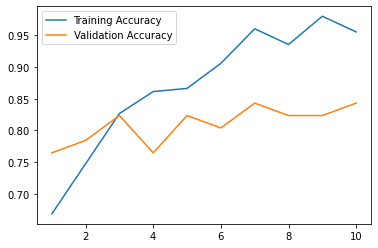

In [32]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()